In [1]:
import numpy as np 
import tensorflow as tf 
import os 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras import layers, utils
from tqdm import tqdm
from skimage.measure import block_reduce
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
def siren_model(n_neurons=128,n_layers=3):
    # create model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(n_neurons, input_shape=(6,), activation=tf.math.sin))
    for i in range(n_layers):
        model.add(tf.keras.layers.Dense(n_neurons, activation=tf.math.sin))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='Adam')
    return model

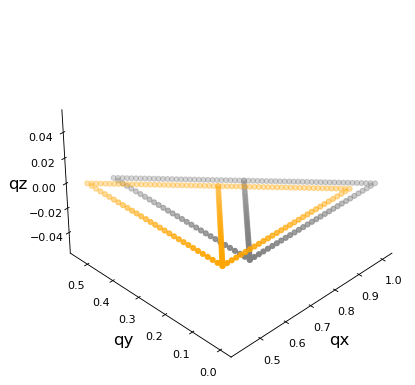

In [3]:
c_q = np.array(pd.read_csv('../data_as_np/AFM_data1/Klist_1.csv',header=None)).T
df1 = pd.read_csv('../data_as_np/AFM_data3/Klist_1.csv',header=None)
df = pd.read_csv('../data_as_np/AFM_data1/Klist_1.csv',header=None)
c_E = np.array(pd.read_csv('../data_as_np/AFM_data1/Elist_1.csv',header=None)).T

c1 = np.array(df).T
c2 = np.array(df1).T

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = c2[:,2]
xline = c2[:,0]
yline = c2[:,1]
ax.scatter(xline, yline, zline, c='orange')

# Data for a three-dimensional line
zline = c1[:,2]
xline = c1[:,0]
yline = c1[:,1]
ax.scatter(xline, yline, zline, c='grey')
ax.set_xlabel('qx', fontsize=15)
ax.set_ylabel('qy', fontsize=15)
ax.set_zlabel('qz', fontsize=15)
ax.grid(False)
# Hide axes ticks
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.view_init(35, 225)



In [4]:
from scipy.ndimage import gaussian_filter
import pandas as pd 
import os 


In [6]:
!pwd

/sdf/group/ml/xpcs/ml_sqw/src


In [8]:
data = [] 
path = 'AFM_data1/' # path to broadened data 
y_data = pd.read_csv(os.path.join(path, 'parameters.csv'))
y_regression = np.array(y_data[['Jp','Jc']])

for k in tqdm(range(1,len(y_regression)+1)):
    
    j1 = y_regression[k-1][0]
    j2 = y_regression[k-1][1]
    
    c_q = np.array(pd.read_csv(os.path.join(path, 'Klist_' + str(k) + '.csv'), header=None)).T
    c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_' + str(k) + '.csv'), header=None)).T
    c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_withCorrectBroadening_' + str(k) + '.csv'), header=None)).T
    
    for j in range(c_sqw.shape[1]):
        for i in range(c_sqw.shape[0]):
            data.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200, j1, j2, c_sqw[i,j]])
data = np.array(data)  

data1 = [] 
path = 'AFM_data3/' # path to broadened data 
y_data = pd.read_csv(os.path.join(path, 'parameters.csv'))
y_regression = np.array(y_data[['Jp','Jc']])

for k in tqdm(range(1,len(y_regression)+1)):
    
    j1 = y_regression[k-1][0]
    j2 = y_regression[k-1][1]
    
    c_q = np.array(pd.read_csv(os.path.join(path, 'Klist_' + str(k) + '.csv'), header=None)).T
    c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_' + str(k) + '.csv'), header=None)).T
    c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_withCorrectBroadening_' + str(k) + '.csv'), header=None)).T
    
    for j in range(c_sqw.shape[1]):
        for i in range(c_sqw.shape[0]):
            data1.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200, j1, j2, c_sqw[i,j]])
data1 = np.array(data1)    


100%|██████████| 600/600 [01:23<00:00,  7.16it/s]


In [9]:
data_both = np.vstack((data, data1))
np.save('data_both_paths_ebroaden', data_both)

In [6]:
data_both = np.load('data_both_paths_ebroaden.npy')

In [10]:
idx = np.random.choice(np.arange(0,len(y_regression)), 120)

In [13]:
data_both.shape

(35040000, 7)

In [14]:
avoid_list = [] 

for i in tqdm(idx):
    avoid_list += list(np.where(np.sum((data_both[:,4:6] - y_regression[i]) ** 2, axis=1) == 0)[0])


100%|██████████| 120/120 [02:04<00:00,  1.04s/it]


In [15]:
keep_list = set(np.arange(0, len(data_both))) - set(avoid_list)

In [20]:
int(len(data_both_test) / 2)

NameError: name 'data_both_test' is not defined

In [21]:
# X_data = data_both[:, 0:6]
# y_data = data_both[:,6]

data_both_train = data_both.take(list(keep_list), axis=0)
data_both_test = data_both.take(list(set(avoid_list)), axis=0)

np.random.shuffle(data_both_train)
np.random.shuffle(data_both_test)

# X_train = data_both_train[:, 0:6]
# X_valid = data_both_test[0:int(len(data_both_test) / 2), 0:6]
# X_test = data_both_test[int(len(data_both_test) / 2):, 0:6]

# y_train = data_both_train[:, 6]
# y_valid = data_both_test[0:int(len(data_both_test) / 2), 6]
# y_test = data_both_test[int(len(data_both_test) / 2):, 6]

         

In [23]:
len(data_both_test)

3095200

In [22]:
int(len(data_both_test) / 2)

1547600

In [30]:
X_train = data_both_train[:, 0:6]
X_valid = data_both_test[0:int(len(data_both_test) / 2), 0:6]
X_test = data_both_test[int(len(data_both_test) / 2):, 0:6]

y_train = data_both_train[:, 6]
y_valid = data_both_test[0:int(len(data_both_test) / 2), 6]
y_test = data_both_test[int(len(data_both_test) / 2):, 6]

         

In [31]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(31944800, 6)
(1547600, 6)
(1547600, 6)


In [32]:
np.savez('paper_data_code/neural_quantum_data2.npz', train_x=X_train, valid_x=X_valid, test_x=X_test, train_y=y_train, valid_y=y_valid, test_y=y_test)


In [33]:
data = np.load('paper_data_code/neural_quantum_data2.npz')


In [34]:
def log_1px_transform(x):
    return np.log(1+x)

In [35]:
epsilon = 1

X_train = data['train_x']
X_valid = data['valid_x']
X_test = data['test_x']

y_train = log_1px_transform(data['train_y'])
y_valid = log_1px_transform(data['valid_y'])
y_test = log_1px_transform(data['test_y'])

In [36]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(31944800, 6)
(1547600, 6)
(1547600, 6)


In [8]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=43)

### Train Model

In [39]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [40]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='model_siren_ebroaden', 
                                                               save_weights_only=False,
                                                                monitor='val_loss',
                                                                mode='min',
                                                                save_best_only=True)

In [41]:
model = siren_model(n_neurons=64, n_layers=4)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer, loss=loss)

Epoch 1/25
7793/7800 [============================>.] - ETA: 0s - loss: 0.0010INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 55s 5ms/step - loss: 0.0010 - val_loss: 7.2795e-04 - lr: 0.0010
Epoch 2/25
7790/7800 [============================>.] - ETA: 0s - loss: 7.9194e-04INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 37s 5ms/step - loss: 7.9147e-04 - val_loss: 4.8359e-04 - lr: 0.0010
Epoch 3/25
7794/7800 [============================>.] - ETA: 0s - loss: 1.6100e-04INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 38s 5ms/step - loss: 1.6093e-04 - val_loss: 7.2352e-05 - lr: 0.0010
Epoch 4/25
7791/7800 [============================>.] - ETA: 0s - loss: 3.6400e-05INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 35s 4ms/step - loss: 3.6392e-05 - val_loss: 3.2538e-05 - lr: 0.0010
Epoch 5/25
7791/7800 [============================>.] - ETA: 0s - loss: 1.9484e-05INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 39s 5ms/step - loss: 1.9481e-05 - val_loss: 3.0846e-05 - lr: 0.0010
Epoch 6/25
7800/7800 [==============================] - 38s 5ms/step - loss: 1.4496e-05 - val_loss: 3.2889e-05 - lr: 0.0010
Epoch 7/25
7798/7800 [============================>.] - ETA: 0s - loss: 1.2334e-05INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 37s 5ms/step - loss: 1.2333e-05 - val_loss: 8.9188e-06 - lr: 0.0010
Epoch 8/25
7800/7800 [==============================] - 36s 5ms/step - loss: 1.0781e-05 - val_loss: 3.3728e-05 - lr: 0.0010
Epoch 9/25
7800/7800 [==============================] - 38s 5ms/step - loss: 1.0167e-05 - val_loss: 9.2214e-06 - lr: 0.0010
Epoch 10/25
7800/7800 [==============================] - 35s 4ms/step - loss: 9.0562e-06 - val_loss: 1.0776e-05 - lr: 0.0010
Epoch 11/25
7800/7800 [==============================] - 39s 5ms/step - loss: 8.1734e-06 - val_loss: 1.2673e-05 - lr: 9.0484e-04
Epoch 12/25
7800/7800 [==============================] - 38s 5ms/step - loss: 7.4145e-06 - val_loss: 1.2425e-05 - lr: 8.1873e-04
Epoch 13/25
7800/7800 [==============================] - 37s 5ms/step - loss: 6.7098e-06 - val_loss: 1.1192e-05 - lr: 7.4082e-04
Epoch 14/25
7797/7800 [============================>.] - ETA: 0s - loss: 6.1569e-06INFO:tensorflow:Assets written to: model_sir

INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 39s 5ms/step - loss: 6.1578e-06 - val_loss: 8.3593e-06 - lr: 6.7032e-04
Epoch 15/25
7800/7800 [==============================] - 39s 5ms/step - loss: 5.6599e-06 - val_loss: 2.2080e-05 - lr: 6.0653e-04
Epoch 16/25
7793/7800 [============================>.] - ETA: 0s - loss: 5.3016e-06INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 41s 5ms/step - loss: 5.3018e-06 - val_loss: 6.3275e-06 - lr: 5.4881e-04
Epoch 17/25
7800/7800 [==============================] - 36s 5ms/step - loss: 5.0324e-06 - val_loss: 8.4330e-06 - lr: 4.9659e-04
Epoch 18/25
7798/7800 [============================>.] - ETA: 0s - loss: 4.7088e-06INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 40s 5ms/step - loss: 4.7091e-06 - val_loss: 5.5968e-06 - lr: 4.4933e-04
Epoch 19/25
7800/7800 [==============================] - 38s 5ms/step - loss: 4.4289e-06 - val_loss: 1.0436e-05 - lr: 4.0657e-04
Epoch 20/25
7798/7800 [============================>.] - ETA: 0s - loss: 4.2614e-06INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 39s 5ms/step - loss: 4.2616e-06 - val_loss: 5.1812e-06 - lr: 3.6788e-04
Epoch 21/25
7800/7800 [==============================] - 38s 5ms/step - loss: 4.0919e-06 - val_loss: 1.2800e-05 - lr: 3.3287e-04
Epoch 22/25
7800/7800 [==============================] - 39s 5ms/step - loss: 3.9166e-06 - val_loss: 6.1128e-06 - lr: 3.0119e-04
Epoch 23/25
7792/7800 [============================>.] - ETA: 0s - loss: 3.7476e-06-INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 39s 5ms/step - loss: 3.7478e-06 - val_loss: 4.5916e-06 - lr: 2.7253e-04
Epoch 24/25
7789/7800 [============================>.] - ETA: 0s - loss: 3.6211e-06- ETA: 0s - losINFO:tensorflow:Assets written to: model_siren_ebroaden/assets


INFO:tensorflow:Assets written to: model_siren_ebroaden/assets


7800/7800 [==============================] - 35s 5ms/step - loss: 3.6221e-06 - val_loss: 4.0549e-06 - lr: 2.4660e-04
Epoch 25/25
7800/7800 [==============================] - 35s 4ms/step - loss: 3.4950e-06 - val_loss: 4.0682e-06 - lr: 2.2313e-04


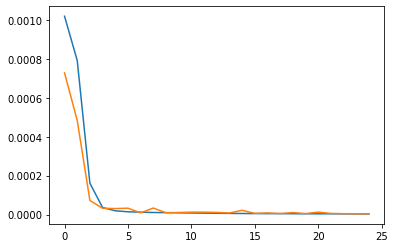

In [42]:
history = model.fit(X_train,y_train, validation_data = (X_valid, y_valid), verbose = 1, batch_size=4096,epochs=25, callbacks=[lr_schedule, model_checkpoint_callback])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [43]:
np.save('history_training_ebroaden', history.history['loss'])
np.save('history_validation_ebroaden', history.history['val_loss'])


In [44]:
def path2mesh(path):
    mesh = [] 

    c_q = np.array(pd.read_csv(os.path.join(path, 'Klist_' + str(k) + '.csv'), header=None)).T
    c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_' + str(k) + '.csv'), header=None)).T
    c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_withBroadening_' + str(k) + '.csv'), header=None)).T

    for j in range(c_sqw.shape[1]):
        for i in range(c_sqw.shape[0]):
            mesh.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200])
            
    return mesh 

def path2mesh_expt(j1, j2, model, path,path_num=2):
    mesh = [] 

    c_q = np.array(pd.read_csv(os.path.join(path, 'Qlist_path' + str(path_num) + '_woBG.csv'), header=None)).T
    c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_path' + str(path_num) + '_woBG.csv'), header=None)[0]).T
    c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_path' + str(path_num) + '_woBG.csv'), header=None)).T
    
    for j in range(c_sqw.shape[1]):
        for i in range(c_sqw.shape[0]):
            mesh.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200])
            
    x = np.array(mesh)
    j1v = np.expand_dims(j1 * np.ones(len(x)),axis=-1)
    j2v = np.expand_dims(j2 * np.ones(len(x)),axis=-1)
    
    x = np.hstack((x,j1v))
    x = np.hstack((x,j2v))

    y_pred = model.predict(x)
   
    y_img = np.reshape(y_pred, (c_sqw.T).shape)
    
    #plt.imshow(y_img, origin='lower')
    #plt.colorbar()
    #plt.show()      
        
    return y_img 

def plot_sqt(j1, j2, path, model):
    
    mesh = [] 

    c_q = np.array(pd.read_csv(os.path.join(path, 'Klist_1.csv'), header=None)).T
    c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_1.csv'), header=None)).T
    c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_withBroadening_1.csv'), header=None)).T
    
    for j in range(c_sqw.shape[1]):
        for i in range(c_sqw.shape[0]):
            mesh.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200])
            
    x = np.array(mesh)
    j1v = np.expand_dims(j1 * np.ones(len(x)),axis=-1)
    j2v = np.expand_dims(j2 * np.ones(len(x)),axis=-1)
    
    x = np.hstack((x,j1v))
    x = np.hstack((x,j2v))

    y_pred = model.predict(x)
   
    y_img = np.reshape(y_pred, (c_sqw.T).shape)

    #y_img = block_reduce(y_img, block_size=(2,2),func=np.mean)
    
    plt.imshow(y_img, origin='lower')
    plt.colorbar()
    plt.show()
    
    return y_img

In [92]:
model.save("paper_data_code/mlp_surrogate_expt_coord")


INFO:tensorflow:Assets written to: paper_data_code/mlp_surrogate_expt_coord/assets


INFO:tensorflow:Assets written to: paper_data_code/mlp_surrogate_expt_coord/assets


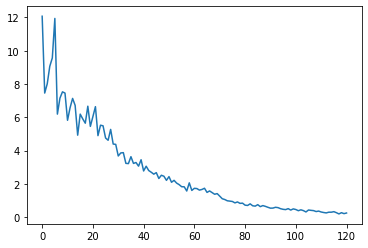

In [198]:
plt.plot(bkg)

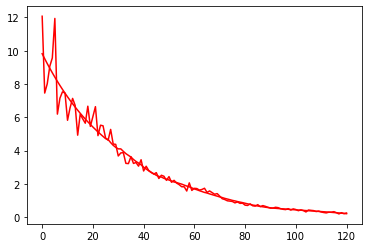

In [259]:

yhat = savgol_filter(bkg, 51, 3) # window size 51, polynomial order 3
plt.plot(x,yhat, color='red')
plt.plot(x,bkg, color='red')
plt.show()

In [234]:
c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_path2.csv'), header=None)).T


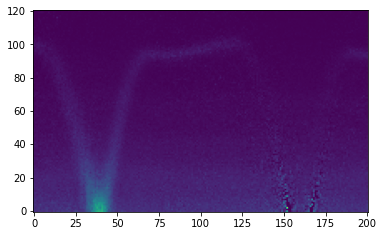

In [236]:
plt.imshow(c_sqw.T, origin='lower')

In [251]:
from scipy.signal import savgol_filter

def generate_background(c_sqw, start, end):
    bkg = np.mean(c_sqw.T[:,start:end],axis=1)
    yhat = savgol_filter(bkg, 51, 3) # window size 51, polynomial order 3
    BKG = (np.expand_dims(yhat,axis=-1) * np.expand_dims(np.ones(c_sqw.shape[0]),axis=0)).T
    return BKG

## Test Data

In [45]:
tf.random.set_seed(47)

In [46]:
model = tf.keras.models.load_model('model_siren_ebroaden')

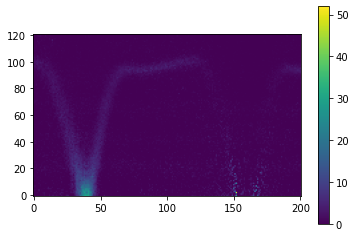

(201, 121)


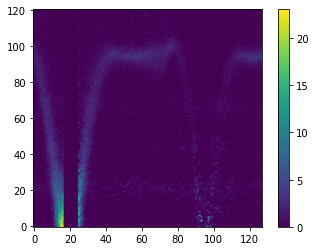

(127, 121)


In [255]:
from numpy import genfromtxt
import cv2

path = '../data_test/' # path to broadened data 

test_x_1 = []
test_y_1 = [] 
weight_1 = []

c_q = np.array(pd.read_csv(os.path.join(path, 'Qlist_path2_woBG.csv'), header=None)).T
c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_path2_woBG.csv'), header=None)[0]).T
c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_path2.csv'), header=None)).T
c_err = np.array(pd.read_csv(os.path.join(path, 'Err_path2_step_number.csv'), header=None)).T

c_sqw -= generate_background(c_sqw, 150, 160)
c_sqw[c_sqw < 0] = 0

plt.imshow(c_sqw.T, origin='lower')  
plt.imshow((c_sqw.T), origin = 'lower')
plt.colorbar()
plt.show()

print(c_sqw.shape)

for j in range(c_sqw.shape[1]):
    for i in range(c_sqw.shape[0]):
        test_x_1.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200])
        test_y_1.append(c_sqw[i,j])
        weight_1.append(c_err[i,j])
test_x_1 = np.array(test_x_1) 
test_y_1 = np.array(test_y_1)
weight_1 = np.array(weight_1)

test_x_2= []
test_y_2= [] 
weight_2 = [] 

c_q = np.array(pd.read_csv(os.path.join(path, 'Qlist_path3_woBG.csv'), header=None)).T
c_E = np.array(pd.read_csv(os.path.join(path, 'Elist_path3_woBG.csv'), header=None)[0]).T
c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_path3.csv'), header=None)).T
c_err = np.array(pd.read_csv(os.path.join(path, 'Err_path3.csv'), header=None)).T

c_sqw -= generate_background(c_sqw, 95, 100)
c_sqw[c_sqw < 0] = 0
#_sqw = (c_sqw - np.min(c_sqw))/(np.max(c_sqw) - np.min(c_sqw))

plt.imshow((c_sqw.T),origin = 'lower')
plt.colorbar()
plt.show()

print(c_sqw.shape)

for j in range(c_sqw.shape[1]):
    for i in range(c_sqw.shape[0]):
        test_x_2.append([c_q[i][0], c_q[i][1], c_q[i][2], float(c_E[j])/200])
        test_y_2.append(c_sqw[i,j])
        weight_2.append(c_err[i,j])
test_x_2 = np.array(test_x_2) 
test_y_2 = np.array(test_y_2)
weight_2 = np.array(weight_2)

# X_real = genfromtxt('../data_test/Sqw_path2_woBG.csv', delimiter=',')
# X_real = np.expand_dims(X_real, axis=-1)
# X_real = cv2.resize(X_real, dsize=(146, 120))

# X_subsample = block_reduce(X_real, block_size=(2,2),func=np.mean)
# X_subsample = (X_subsample - np.min(X_subsample))/(np.max(X_subsample) - np.min(X_subsample))

# model = tf.keras.models.load_model("mlp_surrogate_expt")

In [246]:
import tensorflow as tf
import tensorflow_probability as tfp
def correlation_loss(y_true, y_pred):
    y_true_flat = layers.Flatten(name="Y_TRUE_FLAT")(y_true)
    y_pred_flat = layers.Flatten(name="Y_PRED_FLAT")(y_pred)
    cov =  tfp.stats.covariance(y_true_flat, y_pred_flat, sample_axis=0, event_axis=None, name="COVARIANCE")
    std_y_trueR = tfp.stats.stddev(y_true_flat, sample_axis=0, keepdims=False, name="LOSS_STD_TRUE")
    std_y_predR = tfp.stats.stddev(y_pred_flat, sample_axis=0, keepdims=False, name="LOSS_STD_PRED")
    corr = tf.math.divide(cov,tf.math.multiply(std_y_trueR,std_y_predR, name="MULT_STDs"), name="CORRELATION")
    loss = tf.math.subtract(1.0,corr[0], name="CORR_LOSS")
    return loss


100%|██████████| 2000/2000 [00:37<00:00, 53.54it/s]


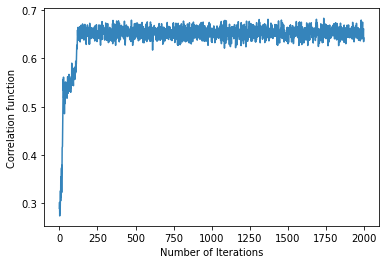

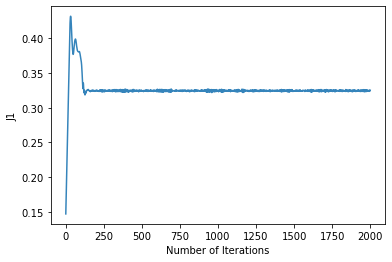

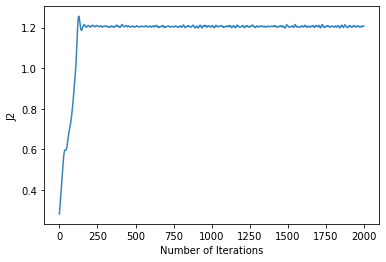

In [247]:
batch_size = 10000
max_iter = 2000
learning_rate = 0.01
test_x = tf.convert_to_tensor(np.vstack((test_x_1, test_x_2[test_y_2 != 0])), dtype=tf.float32)
test_y = tf.convert_to_tensor(np.concatenate((test_y_1, test_y_2[test_y_2 != 0])), dtype=tf.float32)
error_weights = (1 / tf.convert_to_tensor(np.concatenate((weight_1, weight_2)), dtype=tf.float32)) ** 2

#test_x = tf.convert_to_tensor(test_x_2, dtype=tf.float32)
#test_y = tf.convert_to_tensor(test_y_2, dtype=tf.float32)
#error_weights = (1 / tf.convert_to_tensor(weight_1, dtype=tf.float32))**2

loss_vals = [] 

metrics = [] 
# Adam optimizer 
opt = tf.optimizers.Adam(learning_rate)
    
# MSE loss function
#loss_fn = correlation_coefficient()
    
j1 = tf.Variable(tf.random.uniform(shape=[1],minval=-0.5,maxval=0.5), constraint=lambda t: tf.clip_by_value(t, -0.5, 0.5))
j2 = tf.Variable(tf.random.uniform(shape=[1],minval=0.0,maxval=1.5), constraint=lambda t: tf.clip_by_value(t, 0.0, 1.5))

for i in tqdm(range(max_iter)):
    
    ones_vector = tf.ones(test_x.shape[0])
    
    with tf.GradientTape() as tape:
        
        tape.watch(j1)
        tape.watch(j2)

        j1_vector = tf.expand_dims(j1 * ones_vector,axis=-1)
        j2_vector = tf.expand_dims(j2 * ones_vector,axis=-1)

        # forward model 
        x_in = tf.concat((test_x, j1_vector, j2_vector),axis=1)
        ridxs = tf.convert_to_tensor(np.random.choice(np.arange(0, len(x_in)), batch_size))
        x_in_batch = tf.gather(x_in, ridxs)
        
        y_pred_batch =  tf.clip_by_value(model(x_in_batch), 0, 10000)
        test_y_batch = tf.expand_dims(tf.math.log(tf.clip_by_value(tf.gather(test_y, ridxs),0,10000) + 1),axis=-1)
        
        #y_pred_batch =  tf.math.exp(model(x_in_batch)) - 1
        #test_y_batch = tf.expand_dims(tf.clip_by_value(tf.gather(test_y, ridxs),0,10000), axis=-1)
        #filter_idx = y_pred_batch > 0.001
        
        #y_pred_batch = y_pred_batch[filter_idx]
        #test_y_batch = test_y_batch[filter_idx]
        
        #weights_batch = tf.gather(error_weights, ridxs)
        #weights = test_y_batch
        
        #loss = weighted_correlation_loss(test_y_batch, y_pred_batch, weights)
        loss = correlation_loss(y_pred_batch, test_y_batch)
        #loss =  weighted_mse(test_y_batch, y_pred_batch, weights)
            
    # Take derivative of surrogate model w.r.t j1, j2 
    gradients = tape.gradient(loss, [j1, j2])
    opt.apply_gradients(zip(gradients, [j1, j2]))
        
    metrics.append([float(loss), float(j1), float(j2)])

metrics = np.array(metrics)

plt.plot(np.arange(0,max_iter), 1 - metrics[:,0], alpha=0.9)
plt.xlabel("Number of Iterations")
plt.ylabel("Correlation function")
plt.show()

plt.plot(np.arange(0,max_iter), metrics[:,1], alpha=0.9)
plt.xlabel("Number of Iterations")
plt.ylabel("J1")
plt.show()

plt.plot(np.arange(0,max_iter), metrics[:,2], alpha=0.9)
plt.xlabel("Number of Iterations")
plt.ylabel("J2")
plt.show()

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.32530206], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.2079926], dtype=float32)>


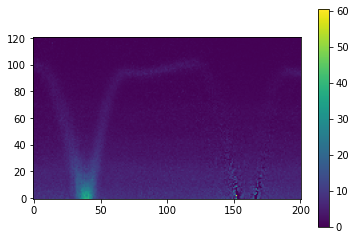

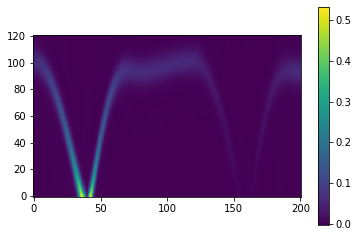

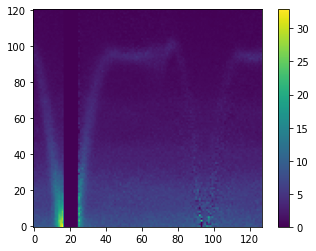

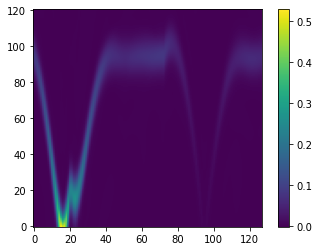

In [249]:
#min_loss, min_loss_j1, min_loss_j2 = metrics[np.argmin(metrics[:,0])]
print(j1)
print(j2)


for i in [2,3]:
    path = '../data_test/'
    
    y_img = path2mesh_expt(float(j1), float(j2), model, path, path_num=i)
    #c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_path' + str(i) + '_woBG.csv'), header=None)).T
    
    c_sqw = np.array(pd.read_csv(os.path.join(path, 'Sqw_path' + str(i) + '.csv'), header=None)).T

    c_sqw[c_sqw < 0] = 0 
    
    plt.imshow(c_sqw.T, origin='lower') 
    plt.colorbar()
    plt.show()
    
    plt.imshow(np.exp(y_img)-1, origin='lower') 
    plt.colorbar()
    plt.show()



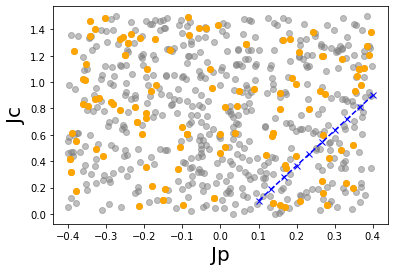

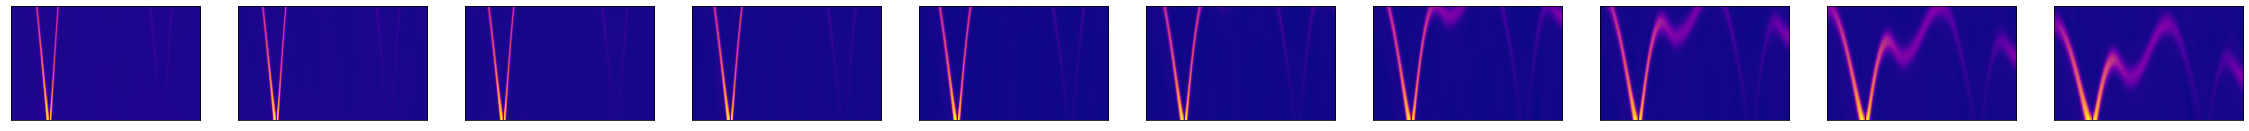

In [156]:
from matplotlib.colors import LogNorm

new_path = np.stack((np.linspace(0.1, 0.4, 10), np.linspace(0.1, 0.9, 10))).T

plt.scatter(y_regression[:,0], y_regression[:,1], c='grey', alpha=0.5)
plt.scatter(y_regression[idx][:,0], y_regression[idx][:,1], c='orange', alpha=1)
plt.plot(new_path[:,0], new_path[:,1], '--bx', alpha=1)
plt.xlabel('Jp', fontsize=20)
plt.ylabel('Jc', fontsize=20)
plt.show()

fig=plt.figure(figsize=(40,25))
columns = 10
rows = 1
i = 1
for jvector in new_path:
    j1 = jvector[0]
    j2 = jvector[1]
    
    y_img = path2mesh_expt(float(j1), float(j2), model, path, path_num=2)
    
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(np.log(y_img+0.1), origin='lower', cmap='plasma') 
    #plt.arrow(
    plt.xticks([])
    plt.yticks([])
    i += 1 
               
plt.show()
    
    

# Loss landscape

In [96]:
test_x.shape

(24321, 4)

In [116]:
test_x = np.vstack((test_x_1, test_x_2))
test_y = tf.convert_to_tensor(np.concatenate((test_y_1, test_y_2)), dtype=tf.float32)

#test_x = test_x_1
#test_y = test_y_1

loss_vals = []

# Define a uniform grid to evaluate loss function
j1 = np.linspace(-0.5, 0.5, 50)
j2 = np.linspace(0.0, 1.5, 50)
j1j1, j2j2 = np.meshgrid(j1,j2)
j1_all = np.ravel(j1j1)
j2_all = np.ravel(j2j2)


for i in tqdm(range(len(j1_all))):
    j1 = j1_all[i]
    j2 = j2_all[i]
    
    j1_vector = tf.expand_dims(j1 * ones_vector,axis=-1)
    j2_vector = tf.expand_dims(j2 * ones_vector,axis=-1)
        
    x_in = tf.concat((test_x, j1_vector, j2_vector),axis=1)
    y_pred = model.predict(x_in)
    
    loss = correlation_loss(test_y, y_pred)
    loss_vals.append([j1_all[i], j2_all[i], float(loss)])

loss_vals = np.array(loss_vals)
np.save('loss_landscape', loss_vals)

  0%|          | 8/2500 [00:12<1:03:39,  1.53s/it]


KeyboardInterrupt: 

In [114]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.tricontour(loss_vals[:,0], loss_vals[:,1], loss_vals[:,2], 21, linewidths=2.0, cmap='gist_heat')
plt.xlabel('J1', fontsize=16)
plt.ylabel('J2', fontsize=16)
plt.scatter([0.328], [1.2198], marker = '*', s=300, color = 'maroon', label = 'Analytical Fitting')
plt.scatter([0.329], [1.14], marker = '*', s=300, color = 'maroon', label = 'Analytical Fitting')
plt.legend(loc='upper left')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>